In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [36]:
df = pd.read_csv('kyphosis.csv')

In [37]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [38]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


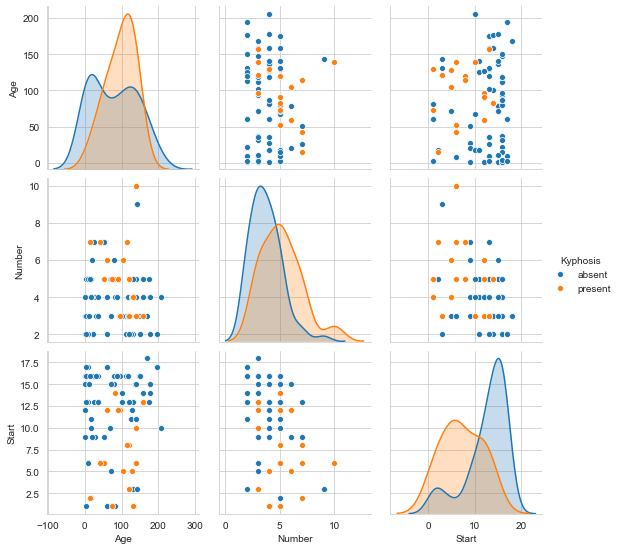

In [40]:
sns.pairplot(df,hue='Kyphosis')

# MACHINE LEARNING: TEST AND TRAINING

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [43]:
x = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# DECISION TREE: TRAIN A SINGLE DECISION TREE

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
decision_tree = DecisionTreeClassifier()

In [47]:
decision_tree

DecisionTreeClassifier()

In [48]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
# evaluate the model to see how well it did
predictions = decision_tree.predict(x_test)

In [50]:
predictions

array(['absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.74      0.94      0.83        18
     present       0.50      0.14      0.22         7

    accuracy                           0.72        25
   macro avg       0.62      0.54      0.53        25
weighted avg       0.67      0.72      0.66        25



In [53]:
print(confusion_matrix(y_test, predictions))

[[17  1]
 [ 6  1]]


In [63]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier(n_estimators=200)

In [69]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [70]:
rfc_pred = rfc.predict(x_test)

In [71]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))


[[17  1]
 [ 6  1]]


              precision    recall  f1-score   support

      absent       0.74      0.94      0.83        18
     present       0.50      0.14      0.22         7

    accuracy                           0.72        25
   macro avg       0.62      0.54      0.53        25
weighted avg       0.67      0.72      0.66        25



In [73]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

# tree vizualization

In [64]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot


In [65]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [67]:
dot_data = StringIO()  
export_graphviz(decision_tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

FileNotFoundError: [Errno 2] "dot" not found in path.

# PROJECT: DECISION TREE

In [74]:
loans = pd.read_csv('loan_data.csv')

In [75]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [76]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [77]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [78]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

Text(0.5, 0, 'FICO')

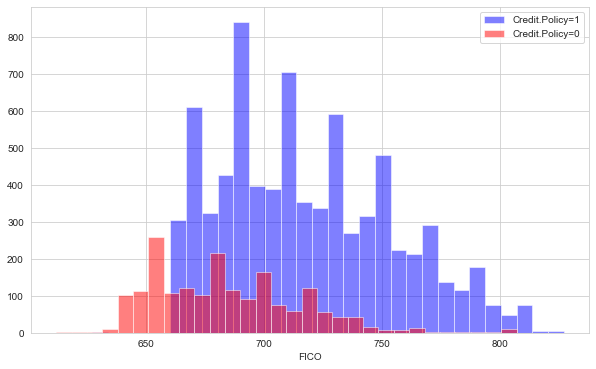

In [81]:
# exploratory data analysis
plt.figure(figsize=(10,6))

loans[loans['credit.policy'] == 1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
loans[loans['credit.policy'] == 0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')

plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

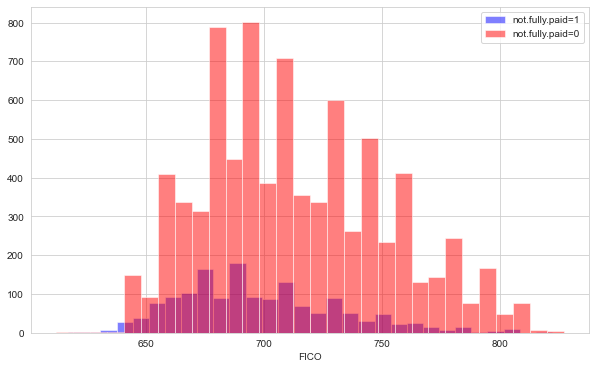

In [82]:
plt.figure(figsize=(10,6))

loans[loans['not.fully.paid'] == 1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid'] == 0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')

plt.legend()
plt.xlabel('FICO')

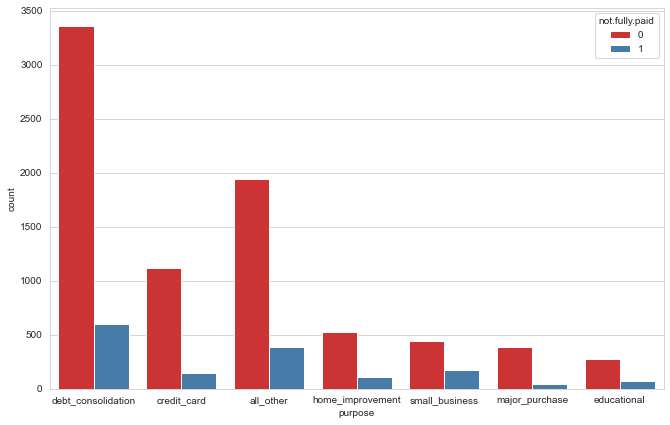

In [85]:
plt.figure(figsize=(11,7))
sns.countplot(x="purpose", data=loans, hue="not.fully.paid", palette="Set1")

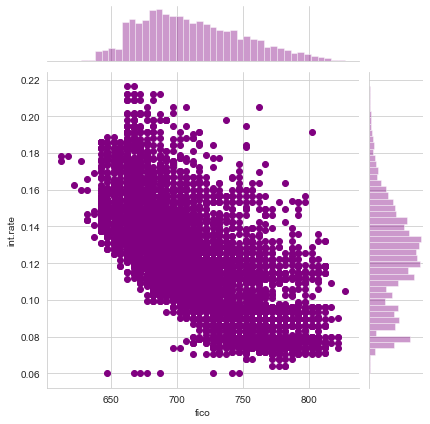

In [88]:
sns.jointplot(x="fico", y="int.rate", data=loans, color="purple")

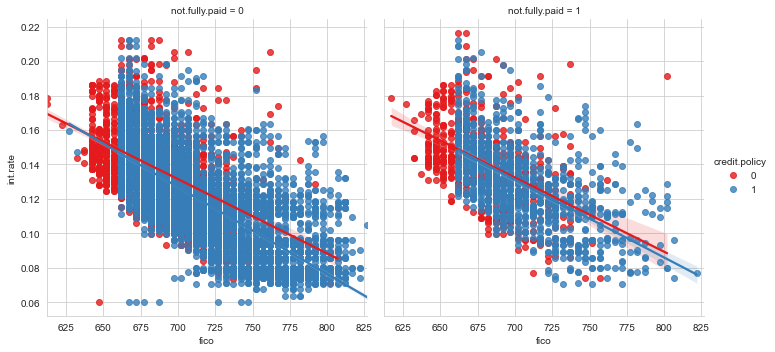

In [89]:
sns.lmplot(y='int.rate', x='fico', data=loans, hue='credit.policy', col='not.fully.paid', palette='Set1')

In [90]:
# set up the data for random forest classification model
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [91]:
# categorical features
cat_feats = ['purpose']

In [92]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [107]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [94]:
# train test split
from sklearn.model_selection import train_test_split

In [95]:
x = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.3)

In [96]:
# train a decison tree model
from sklearn.tree import DecisionTreeClassifier

In [97]:
dtree = DecisionTreeClassifier()

In [98]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [99]:
# predictions and evaluation of a decison tree model
predictions = dtree.predict(x_test)

In [100]:
predictions

array([0, 0, 1, ..., 1, 1, 0])

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      5619
           1       0.21      0.23      0.22      1085

    accuracy                           0.73      6704
   macro avg       0.53      0.53      0.53      6704
weighted avg       0.74      0.73      0.74      6704



In [103]:
print(confusion_matrix(y_test, predictions))

[[4660  959]
 [ 834  251]]


In [104]:
# training the random forest model
from sklearn.ensemble import RandomForestClassifier

In [105]:
rfc = RandomForestClassifier(n_estimators=200)

In [106]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [108]:
# predictions and evaluation of a random forest model
rfc_prediction = rfc.predict(x_test)

In [109]:
print(classification_report(y_test, rfc_prediction))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      5619
           1       0.35      0.01      0.03      1085

    accuracy                           0.84      6704
   macro avg       0.59      0.50      0.47      6704
weighted avg       0.76      0.84      0.77      6704



In [110]:
print(confusion_matrix(y_test, rfc_prediction))

[[5591   28]
 [1070   15]]
